Name Daniel M Smith
Phase4 Recommender System Project
1 on 1 Review Date

Buisness Problem:  Recommender Systems in order to see how 

We are building a Recommender system for Movies from the 100KMovieLens dataset.

#  Obtain

The Data is from the MovieLens.com site.  The data has over 100K rows in the ratings Sheet, over 9000 in the links table which links the movieid, to imdb id and to the tmdbid.  The movie table has over 9000 as well and the tage data has over 3600 rows of info.

In [2]:
import pandas as pd
ratings_df = pd.read_csv('./data/ratings.csv')
links_df = pd.read_csv('./data/links.csv')
movies_df = pd.read_csv('./data/movies.csv')
tags_df = pd.read_csv('./data/tags.csv')
ratings_df.info()
links_df.info()
movies_df.info()
tags_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null  

In [3]:
# Drop unnecessary columns
ratings_df = ratings_df.drop(columns='timestamp')
# Drop unnecessary columns
tags_df = tags_df.drop(columns='timestamp')

Dropping unneeded info.

#  Scrub

#Remove Duplicates and clean up Nans.

In [14]:
ratings_df.isna().sum()

userId     0
movieId    0
rating     0
dtype: int64

No Nans to clean up.

In [5]:
ratings_df.describe()


,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


#  Explore

### Ratings Distribution

In [6]:
#Rating Distro

In [34]:
ratings_df['rating'].value_counts(normalize=True)

4.0    0.265957
3.0    0.198808
5.0    0.131015
3.5    0.130271
4.5    0.084801
2.0    0.074884
2.5    0.055040
1.0    0.027877
1.5    0.017762
0.5    0.013586
Name: rating, dtype: float64

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

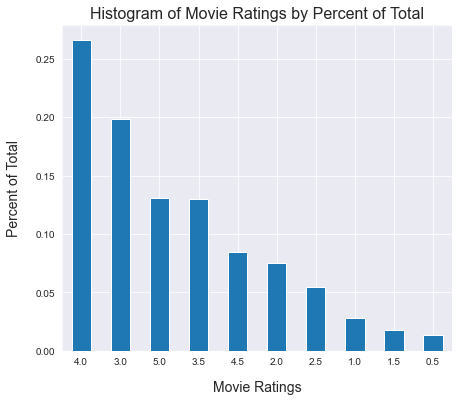

In [159]:
ratings_df['rating'].value_counts(normalize=True).plot(kind='bar', figsize=(7, 6), rot=0)
plt.ylabel("Percent of Total", labelpad=14, fontsize=14)
plt.xlabel("Movie Ratings", labelpad=14,fontsize=14)
plt.title("Histogram of Movie Ratings by Percent of Total", fontsize=16);

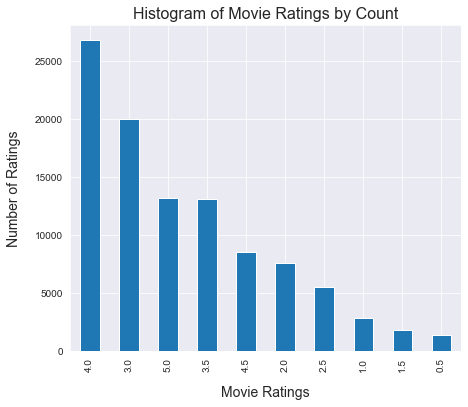

In [158]:
sns.set_style("darkgrid")
ratings_df['rating'].value_counts().plot(kind='bar', figsize=(7, 6))
plt.ylabel("Number of Ratings", labelpad=14, fontsize=14)
plt.xlabel("Movie Ratings", labelpad=14,fontsize=14)
plt.title("Histogram of Movie Ratings by Count",fontsize=16);

In [58]:
ratings_df['rating'].agg(['mean', 'std','median'])

mean      3.501557
std       1.042529
median    3.500000
Name: rating, dtype: float64

In [60]:
movies_df['genres'].value_counts()

Drama                                   1053
Comedy                                   946
Comedy|Drama                             435
Comedy|Romance                           363
Drama|Romance                            349
                                        ... 
Comedy|Drama|Fantasy|Mystery|Romance       1
Action|Fantasy|Sci-Fi|IMAX                 1
Crime|Drama|Musical|Thriller               1
Drama|Horror|War                           1
Crime|Horror|Sci-Fi                        1
Name: genres, Length: 951, dtype: int64

Many mixes of Genres with Drama the singular most.  We could break break the long strings up to determine total if they had that genre in the string.

In [61]:
movies_df['genres'].head()

0    Adventure|Animation|Children|Comedy|Fantasy
1                     Adventure|Children|Fantasy
2                                 Comedy|Romance
3                           Comedy|Drama|Romance
4                                         Comedy
Name: genres, dtype: object

In [71]:
movies_lst = movies_df['genres'].tolist()

In [82]:
def genre_count(genres):
    count = dict()

    for entry in genres:
        for word in entry.split('|'):
            if word in count:
                count[word] += 1
            else:
                count[word] = 1
    return count


In [83]:
count = genre_count(movies_lst)

In [84]:
count

{'Adventure': 1263,
 'Animation': 611,
 'Children': 664,
 'Comedy': 3756,
 'Fantasy': 779,
 'Romance': 1596,
 'Drama': 4361,
 'Action': 1828,
 'Crime': 1199,
 'Thriller': 1894,
 'Horror': 978,
 'Mystery': 573,
 'Sci-Fi': 980,
 'War': 382,
 'Musical': 334,
 'Documentary': 440,
 'IMAX': 158,
 'Western': 167,
 'Film-Noir': 87,
 '(no genres listed)': 34}

In [125]:
sortedcount=dict(sorted(count.items(), key=lambda item: item[1]))

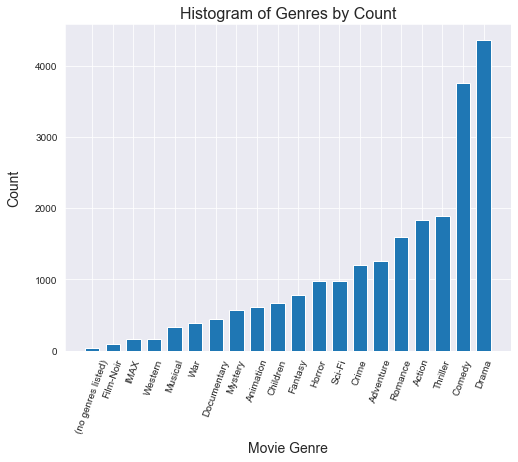

In [156]:
plt.figure(figsize=(8, 6))
plt.bar(list(sortedcount.keys()),list(sortedcount.values()), width=.7, )
plt.ylabel("Count", labelpad=14, fontsize=14)
plt.xlabel("Movie Genre", labelpad=7, fontsize=14)
plt.title("Histogram of Genres by Count", fontsize=16);
plt.xticks(rotation=70);

In [ ]:
TO DO ... How Many movies has either has comedy or Drama in genre?

#  Model

Surprise is a scikit package for building and analysing recommender systems maintained by Nicolas Hug.

In [ ]:
from surprise import Reader, Dataset
reader = Reader()
ratings_sp = Dataset.load_from_df(ratings_df,reader)

In [ ]:
from surprise.model_selection import cross_validate, GridSearchCV
from surprise.prediction_algorithms import SVD, NMF, SlopeOne, CoClustering 
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline, BaselineOnly
import numpy as np

### Cross Validate

In [ ]:
cross_validate(SVD(), ratings_sp, measures=['RMSE', 'MAE'], cv=5, verbose=True)

In [ ]:
cross_validate(NMF(), ratings_sp, measures=['RMSE', 'MAE'], cv=5, verbose=True)

In [ ]:
cross_validate(SlopeOne(), ratings_sp, measures=['RMSE', 'MAE'], cv=5, verbose=True)

In [ ]:
cross_validate(CoClustering(), ratings_sp, measures=['RMSE', 'MAE'], cv=5, verbose=True)

In [ ]:
cross_validate(BaselineOnly(), ratings_sp, measures=['RMSE', 'MAE'], cv=5, verbose=True)

### Gridsearch SVD

#### Gridsearch on SVD

In [38]:
params = {'n_factors': [10,25,50,75,100],
         'reg_all': [0.02, 0.04, 0.06, 0.08, 0.1]}
gs_svd = GridSearchCV(SVD,param_grid=params,n_jobs=-1)
gs_svd.fit(ratings_sp)

In [39]:
print(gs_svd.best_score)
print(gs_svd.best_params)

{'rmse': 0.8688002520258602, 'mae': 0.6680934755735739}
{'rmse': {'n_factors': 75, 'reg_all': 0.06}, 'mae': {'n_factors': 50, 'reg_all': 0.04}}


Based off these outputs, it seems like the best performing model is the SVD model with n_factors = 75 and a regularization rate of 0.06.

#### Gridsearch on BaselineOnly ALS

In [34]:
params = {'bsl_options': {'method': ['als'],
                              'reg_i': [8, 9, 10, 11, 12], # lambda 2
                              'reg_u': [3, 4, 5, 6, 7],# lambda 3
                             }
         }
gs_bo = GridSearchCV(BaselineOnly,param_grid=params,n_jobs=-1)
gs_bo.fit(ratings_sp)

In [35]:
print(gs_bo.best_score)
print(gs_bo.best_params)

{'rmse': 0.8699094486127269, 'mae': 0.6693305255443935}
{'rmse': {'bsl_options': {'method': 'als', 'reg_i': 8, 'reg_u': 4}}, 'mae': {'bsl_options': {'method': 'als', 'reg_i': 8, 'reg_u': 3}}}


### Recommendations

In [201]:
movies_df.head(50)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [42]:
dataset = ratings_sp.build_full_trainset()
print('Number of users: ', dataset.n_users, '\n')
print('Number of items: ', dataset.n_items)

Number of users:  610 

Number of items:  9724


In [45]:
svd = SVD(n_factors= 75, reg_all=0.06)
svd.fit(dataset)

In [60]:
#predict for first user and first movie
#last user first movie
svd.predict(1, 1)


Prediction(uid=1, iid=1, r_ui=None, est=4.598180853475434, details={'was_impossible': False})

In [59]:
### last user first movie
svd.predict(610, 1)


Prediction(uid=610, iid=1, r_ui=None, est=4.057444096106535, details={'was_impossible': False})

In [53]:
ratings_df

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [204]:
def new_interview(userID):
    genIds = []
    genres = { '1' :'Action' , '2' :'Adventure' , '3' :'Drama', '4' :'Comedy' , '5' :'Horror' , '6' :'Sci-Fi'}
    top3 = []
    num = 1
    print(genres)
    while num > 0 :
        
        g1, g2, g3 = input('Please enter your top 3 genres from below.  IE 2 3 5 :\n').split()


        genIds.append(g1)
        genIds.append(g2)
        genIds.append(g3)

        num -= 1

    for gid in genIds:
        top3.append(genres.get(gid))
        
    return top3


In [233]:
def rate_driver(userID):
    genres = { 1 :'Action' , 2 :'Adventure' ,3 :'Drama', 4 :'Comedy' , 5:'Horror' , 6:'Sci-Fi'}
    topgenres = new_interview(userID)
    init_user_rates = []
    
    for genre in topgenres:
        #rate 3 movies for the genre
        init_user_rates.extend(movie_rater(userID, 3, genre))
        
    return init_user_rates
            

In [218]:
def movie_rater(movie_df, num, genre=None):
    userID = 1000
    rating_list = []
    print(genre)
    while num > 0:
        print('##################################################################')
        if genre:
            movie = movies_df[movies_df['genres'].str.contains(genre)].sample(1)
        else:
            movie = movies_df.sample(1)
        print(movie)
        rating = input('How do you rate this movie on a scale of 1-5, press n if you have not seen :\n')
        if rating == 'n':
            continue
        else:
            rating_one_movie = {'userId':userID,'movieId':movie['movieId'].values[0],'rating':rating}
            rating_list.append(rating_one_movie) 
            num -= 1
    return rating_list    

In [251]:
user_rating = rate_driver(1000)

{'1': 'Action', '2': 'Adventure', '3': 'Drama', '4': 'Comedy', '5': 'Horror', '6': 'Sci-Fi'}
Please enter your top 3 genres from below.  IE 2 3 5 :
4 5 6
Comedy
##################################################################
      movieId                         title                          genres
5259     8633  Last Starfighter, The (1984)  Action|Adventure|Comedy|Sci-Fi
How do you rate this movie on a scale of 1-5, press n if you have not seen :
5
##################################################################
     movieId                        title                   genres
968     1269  Arsenic and Old Lace (1944)  Comedy|Mystery|Thriller
How do you rate this movie on a scale of 1-5, press n if you have not seen :
5
##################################################################
      movieId                          title                   genres
3880     5452  Look Who's Talking Now (1993)  Children|Comedy|Romance
How do you rate this movie on a scale of 1-5, press n 

In [235]:
user_rating

[{'userId': 1000, 'movieId': 3584, 'rating': '1'},
 {'userId': 1000, 'movieId': 94405, 'rating': '2'},
 {'userId': 1000, 'movieId': 132462, 'rating': '3'},
 {'userId': 1000, 'movieId': 141718, 'rating': '2'},
 {'userId': 1000, 'movieId': 4527, 'rating': '3'},
 {'userId': 1000, 'movieId': 1810, 'rating': '4'},
 {'userId': 1000, 'movieId': 1331, 'rating': '3'},
 {'userId': 1000, 'movieId': 27584, 'rating': '2'},
 {'userId': 1000, 'movieId': 164367, 'rating': '1'}]

In [252]:
## add the new ratings to the original ratings DataFrame
delta_ratings_df = ratings_df.append(user_rating,ignore_index=True)
delta_rating_sp = Dataset.load_from_df(delta_ratings_df,reader)

In [253]:
# train a model using the new combined DataFrame
svd2 = SVD(n_factors= 75, reg_all=0.06)
svd2.fit(delta_rating_sp.build_full_trainset())

In [254]:
# make predictions for the user
#in the format (movie_id, predicted_score)
list_of_movies = []
for m_id in delta_ratings_df['movieId'].unique():
    list_of_movies.append( (m_id, svd2.predict(1000, m_id)[3]))

In [255]:
# order the predictions from highest to lowest rated
ranked_movies = sorted(list_of_movies, key=lambda x:x[1], reverse=True)

In [256]:
#User id 1000
recommended_movies(ranked_movies,movies_df,5)

Recommendation #  1 :  46    Usual Suspects, The (1995)
Name: title, dtype: object 

Recommendation #  2 :  257    Pulp Fiction (1994)
Name: title, dtype: object 

Recommendation #  3 :  828    Reservoir Dogs (1992)
Name: title, dtype: object 

Recommendation #  4 :  863    Monty Python and the Holy Grail (1975)
Name: title, dtype: object 

Recommendation #  5 :  900    Raiders of the Lost Ark (Indiana Jones and the...
Name: title, dtype: object 



In [384]:
# return the top n recommendations using the 
def recommended_movies(user_ratings,movie_title_df,n, genre):
    genres = ['Action','Horror','Comedy']
    
    for idx, rec in enumerate(user_ratings):
        g = movie_title_df.loc[movie_title_df['movieId'] == int(rec[0])]['genres'][0]
        print(g.to_string())
        if g.to_string().str.contains(genre) :
            #movies = movie_title_df[movie_title_df['genres'].str.contains(g)][:5]
            title = movie_title_df.loc[movie_title_df['movieId'] == int(rec[0])]['title']
            genre = movie_title_df.loc[movie_title_df['movieId'] == int(rec[0])]['genres']
            print('Recommendation # ', idx+1, ': ', title, genre,'\n')
            n-= 1
            if n == 0:
                break


In [385]:
recommended_movies(ranked_movies,movies_df,5,'Comedy')

KeyError: 0

In [263]:
movies_df.loc[movies_df['movieId'] == int(ranked_movies[0][0])]['title']

46    Usual Suspects, The (1995)
Name: title, dtype: object

In [266]:
            
if genre:
            movie = movies_df[movies_df['genres'].str.contains(genre)].sample(1)
        else:
            movie = movies_df.sample(1)

AttributeError: 'list' object has no attribute 'head'

movieId                            50
title      Usual Suspects, The (1995)
genres         Crime|Mystery|Thriller
Name: 46, dtype: object

In [ ]:
Wizard for cold start
What are you in the mood for?
Brains or Braun?



In [213]:
delta_ratings_df

,userId,movieId,rating
0,1,1,4
1,1,3,4
2,1,6,4
3,1,47,5
4,1,50,5
...,...,...,...
100834,610,168252,5
100835,610,170875,3
100836,1000,157865,3
100837,1000,4749,1


# Interpret